<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_18_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
# Load dataset
data = load_breast_cancer()

X = data.data
y = data.target.reshape(-1, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()

        self.fc1 = nn.Linear(input_dim, 5)
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(5, 3)
        self.relu = nn.ReLU()

        self.fc3 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [ ]:
model = ANN(input_dim=X_train.shape[1])

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [ ]:
epochs = 80

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/80], Loss: 0.6535
Epoch [20/80], Loss: 0.6335
Epoch [30/80], Loss: 0.5866
Epoch [40/80], Loss: 0.4902
Epoch [50/80], Loss: 0.4030
Epoch [60/80], Loss: 0.3449
Epoch [70/80], Loss: 0.3035
Epoch [80/80], Loss: 0.2714


In [ ]:
model.eval()

with torch.no_grad():
    y_train_pre = model(X_train)
    y_test_pre = model(X_test)
    y_train_pre = (y_train_pre >= 0.5).float()
    y_test_pre = (y_test_pre >= 0.5).float()

    accuracy_train = accuracy_score(y_train, y_train_pre)
    accuracy_test = accuracy_score(y_test, y_test_pre)

    print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
    print(f"Test Accuracy: {accuracy_test * 100:.2f}%")


Train Accuracy: 96.48%
Test Accuracy: 95.61%


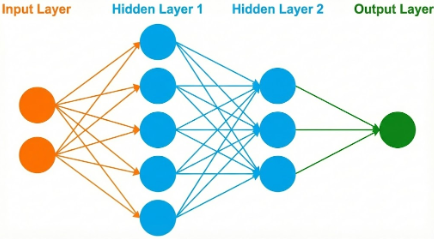

In [ ]:
X = np.random.rand(10, 2)
y = np.random.rand(10, 1)



array([[0.94842277, 0.99626062],
       [0.77667447, 0.16753618],
       [0.16382008, 0.19840557],
       [0.41231409, 0.11478639],
       [0.01584964, 0.25185835],
       [0.76745808, 0.96366953],
       [0.73398258, 0.94903643],
       [0.14491721, 0.28467908],
       [0.93858139, 0.68880714],
       [0.03614693, 0.99808418]])

In [ ]:
class ReLU:
  def __init__(self,):
    pass
  def forward(self, z):
    self.input_ = z
    return np.maximum(z, 0)

  def backward(self, delta):
    return delta * (self.input_ > 0).astype(int)


class Sigmoid:
  def __init__(self,):
    pass

  def forward(self, z):
    self.o =  1 / (1+ np.exp(-z))
    return self.o

  def backward(self, delta):
    return self.o * (1 - self. o)



def BCELoss(y_hat, y):
  eps = 1e-6
  return - np.mean(y * np.log(y_hat +eps) + (1-y) * np.log(1 - y_hat + eps))


In [ ]:
class Layer:
  def __init__(self, out, features, activation = "ReLU", last_layer = False):
    self.weights = np.random.randn(out, features)
    self.bias = np.random.randn(1, out)
    self.last_layer = last_layer

    all_activation = {"ReLU": ReLU(), "Sigmoid": Sigmoid()}
    self.activation = all_activation[activation]


  def forward(self, X):
    self.input_ = X
    o = X @ self.weights.T + self.bias
    o = self.activation.forward(o)
    return o

  def backward(self, delta, lr):
    dl = delta

    if self.last_layer == False:
      dl = self.activation.backward(dl)


    dw = dl.T @ self.input_
    db = np.sum(dl, keepdims=True, axis=0)


    dX =  dl @ self.weights

    self.weights -= lr * dw
    self.bias -= lr * db

    return dX



In [ ]:
class ANN:
  def __init__(self, layers):
    self.layers = layers

  def forward(self, X):
    input_ = X
    for layer in self.layers:
      input_ = layer.forward(input_)
    return input_

  def backward(self, delta, lr):
    dl = delta
    for layer in reversed(self.layers):
      dl = layer.backward(dl, lr)


model = ANN([
    Layer(16, 30),
    Layer(8, 16),
    Layer(3, 8),
    Layer(1, 3, activation="Sigmoid", last_layer= True),
])



(455, 1)

In [ ]:
epochs =500
lr = 0.1

for i in range(epochs):
  y_hat = model.forward(X_train)
  loss = BCELoss(y_hat, y_train)

  n = X_train.shape[0]
  dl = (y_hat - y_train) / n


  model.backward(dl, lr)

  print(loss)




8.235579700263534
0.7412103514416098
0.6365608271983719
0.5874448115551523
0.5532952674283637
0.529567912723589
0.5116318369251821
0.494993617528467
0.4819101309782823
0.4715434749032691
0.46278633391961665
0.4548929786499292
0.44845115741137564
0.4430882309168531
0.43820001266817
0.4337799878262051
0.4292848459495143
0.4238474347827336
0.4191409716158296
0.4142352378364154
0.40968242670448524
0.40538562578695225
0.4012753905355287
0.39720709422944883
0.39316548965761594
0.3894747918676363
0.385884378562979
0.38257859854883824
0.37946618515526864
0.37632691511832655
0.37330735260955966
0.37032746198694305
0.3675795537604965
0.3649210423284314
0.36221553205304663
0.3596080462069282
0.3571327621823582
0.3547491591702447
0.3522954423934232
0.34962658597994606
0.34731079175609364
0.3453656250867991
0.34321912846217156
0.3411690523199024
0.3390784355963827
0.33706013520819106
0.3350528517239249
0.3331282879010903
0.33127739943253354
0.32949252584471994
0.32773708215402764
0.3259620167825512

In [ ]:
y_hat = model.forward(X_train)
y_hat_test = model.forward(X_test)




In [ ]:
y_hat = (y_hat > 0.5).astype(int)
y_hat_test = (y_hat_test > 0.5).astype(int)

acc_train = accuracy_score(y_train, y_hat)
acc_test = accuracy_score(y_test, y_hat_test)
print("Training Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)

Training Accuracy:  0.9846153846153847
Test Accuracy:  0.9649122807017544


In [ ]:
np.random.seed(42)

n_samples = 1000

X = np.random.uniform(-20, 20, size=(n_samples, 2))
x1 = X[:, 0]
x2 = X[:, 1]
y = (
    ((x1 + x2 > 8) & (x1 + x2 < 14)) |
    ((x1 + x2 > -14) & (x1 + x2 < -8))
).astype(int)
y = y.reshape(-1, 1)

In [ ]:
y.shape

(1000, 1)

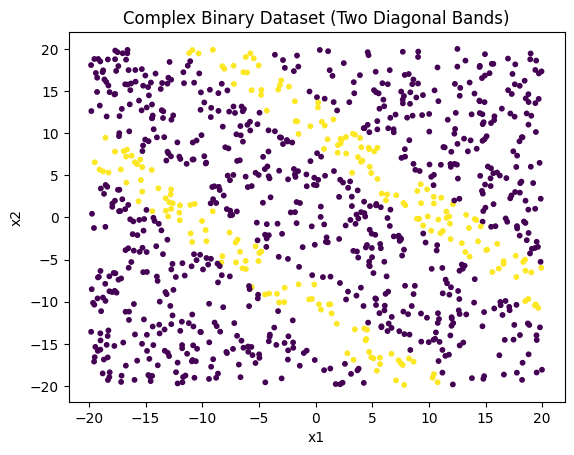

In [ ]:
model = ANN([
    Layer(64, 2),
    Layer(32, 64),
    Layer(16, 32),
    Layer(1, 16, activation="Sigmoid", last_layer= True),
])

In [ ]:
epochs =2000
lr = 0.01

for i in range(epochs):
  y_hat = model.forward(X)
  loss = BCELoss(y_hat, y)

  n = X.shape[0]
  dl = (y_hat - y) / n


  model.backward(dl, lr)

  print(loss)


/tmp/ipython-input-649226605.py:17: RuntimeWarning: overflow encountered in exp
  self.o =  1 / (1+ np.exp(-z))


2.873625404056965
10.629654313249805
2.873625404056965
2.873625404056965
3.017961544988936
4.93352631523996
2.8716817347597496
2.3976353261218546
2.5383127068417797
2.514636374295353
3.155861551089085
2.294326167037883
2.4384022702088797
1.850522111074112
2.6813890405549663
2.356586232011781
1.8791376098270223
1.411355727824345
1.7182551212611192
1.887638596288129
2.4770050548944393
2.2169288390048436
1.4261272929234543
1.7344951757872016
1.6341318642414213
1.256876047747126
1.1532195082784489
1.6282855911384313
1.8373740001800167
1.0915084548075584
0.9727735158349858
1.2108717510085745
1.1190555966654678
1.726812260513551
0.8318479027244937
0.8588186243129661
1.2239295399645032
0.6944273865387386
0.9542966936741288
1.0535740880883175
1.7020141844090904
0.9284446079615171
0.6552343993503168
0.6462979074946447
0.7054353451434097
1.2711148115438962
0.5954624397072271
0.5448151821890803
0.44124903964142836
0.4601541338117285
0.7845856698390421
0.6788049532875655
1.1771472303981496
0.79252

In [ ]:

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z= model.forward(grid)[0]
Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=0, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()

ValueError: cannot reshape array of size 1 into shape (100,100)

In [ ]:
y_hat = model.forward(X)
y_hat = (y_hat >0.5).astype(int)

accuracy_score(y, y_hat)

0.885